In [7]:
# Get Started by importing needed elements
import pandas as pd
import numpy as np
import requests
! conda install -c anaconda lxml -y

# Dataset used for the Chicago Community Neighborhoods
website_url = requests.get('https://en.wikipedia.org/wiki/Community_areas_in_Chicago').text

#Screen scrap from the website using BeautifulSoup
! pip install BeautifulSoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url, "html.parser")
print(soup.prettify())
My_table = soup.find('table',{'class':'wikitable sortable plainrowheaders'})
My_table
links = My_table.findAll('a')
links
Neighborhood = [ ]
for link in links:
    Neighborhood.append(link.get('title'))
    






Solving environment: done

# All requested packages already installed.

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Community areas in Chicago - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDykYbudkRJooPOqJhDMSQAAAAw","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Community_areas_in_Chicago","wgTitle":"Community areas in Chicago","wgCurRevisionId":1001746205,"wgRevisionId":1001746205,"wgArticleId":1265165,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short descrip

In [8]:
# Read the Data into a Dataframe for formatting. 
# Print the Shape

df = pd.DataFrame([])
df = pd.read_html('https://en.wikipedia.org/wiki/Community_areas_in_Chicago')[0]
#get dataframe shape
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (78, 7)

Number of rows : 78

Number of columns : 7


In [9]:
# Clean up the Dataframe
# Clean up column names
# Sort the dataframe by neighborhood name
Chicago_neighborhood=pd.read_html(str(My_table))
Chicago_neighborhood=pd.DataFrame(Chicago_neighborhood[0])
New_Chicago_neighborhood = Chicago_neighborhood.drop(columns=['Area (km2)','2017density (/sq mi.)','2017density (/km2)'],axis=1)
New_Chicago_neighborhood.rename(columns={'Name[8]':'Neighborhood'},inplace=True)
New_Chicago_neighborhood.rename(columns={'Area (sq mi.)[10]':'Area'},inplace=True)
New_Chicago_neighborhood.rename(columns={'2017[9]':'Population'},inplace=True)
New_Chicago_neighborhood.sort_values('Neighborhood',axis=0,inplace=True)
print(New_Chicago_neighborhood)                

   Number[8]    Neighborhood  Population  Area
31        32  (The) Loop[11]       35880  1.65
13        14     Albany Park       51992  1.92
56        57  Archer Heights       13142  2.01
33        34   Armour Square       13455  1.00
69        70         Ashburn       43792  4.86
..       ...             ...         ...   ...
64        65       West Lawn       33108  2.95
52        53    West Pullman       27742  3.56
1         02      West Ridge       76215  3.53
23        24       West Town       84502  4.58
41        42        Woodlawn       23268  2.07

[78 rows x 4 columns]


In [10]:
# Read in the dataset that contains the latitude and Longitude for each Chicago neighborhood
# Create a new Dataframe for this data
# Merge the data onto the existing Wikipedia dataframe.
New_Dataframe = pd.read_csv("Chicago_Community_Lat_Long4.csv") 
New_Dataframe

merged_Dataframe = pd.merge(left=New_Chicago_neighborhood, right=New_Dataframe)
# What's the size of the output data?
merged_Dataframe.shape
#Printed the combined Dataframe that contains each Neighborhood with latitude and Longitude
merged_Dataframe


,Number[8],Neighborhood,Population,Area,Number,Poulation,latitude,longitude,Crime Flag
0,14,Albany Park,51992,1.92,14,"51,992",41.967530,-87.706020,ok
1,57,Archer Heights,13142,2.01,57,"13,142",41.802080,-87.723860,ok
2,34,Armour Square,13455,1.00,34,"13,455",41.850010,-87.635780,ok
3,70,Ashburn,43792,4.86,70,"43,792",41.941680,-88.198700,ok
4,71,Auburn Gresham,46278,3.77,71,"46,278",41.743180,-87.655980,12
...,...,...,...,...,...,...,...,...,...
71,65,West Lawn,33108,2.95,65,"33,108",41.765940,-87.720000,ok
72,53,West Pullman,27742,3.56,53,"27,742",NaN,NaN,19
73,02,West Ridge,76215,3.53,2,"76,215",41.987438,-87.661110,ok
74,24,West Town,84502,4.58,24,"84,502",41.901390,-87.677238,ok


In [11]:
# Filter Rows with a Crime Flag that is not ok
# We know we want our store in a low crime area
merged_Dataframe1 = merged_Dataframe[((merged_Dataframe['Crime Flag'] == 'ok'))]
merged_Dataframe1




,Number[8],Neighborhood,Population,Area,Number,Poulation,latitude,longitude,Crime Flag
0,14,Albany Park,51992,1.92,14,"51,992",41.967530,-87.706020,ok
1,57,Archer Heights,13142,2.01,57,"13,142",41.802080,-87.723860,ok
2,34,Armour Square,13455,1.00,34,"13,455",41.850010,-87.635780,ok
3,70,Ashburn,43792,4.86,70,"43,792",41.941680,-88.198700,ok
6,45,Avalon Park,9985,1.25,45,"9,985",41.745920,-87.594160,ok
7,21,Avondale,37368,1.98,21,"37,368",41.989590,-87.795914,ok
8,19,Belmont Cragin,79910,3.91,19,"79,910",41.927660,-87.766090,ok
9,72,Beverly Hills,20822,3.18,72,"20,822",41.695900,-87.649970,ok
10,60,Bridgeport,33637,2.09,60,"33,637",41.812538,-87.632347,ok
11,58,Brighton Park,44813,2.72,58,"44,813",41.820430,-87.691580,ok


In [12]:
# Import further Libraries that we will need to map and analyze the data

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-

In [13]:
# Now we will create a map of the Chicago neighborhoods. 
# First we will get the Longitude and Latitude of Chicago, IL
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Chicago are {}, {}.'.format(latitude, longitude))


The coordinates of Chicago are 41.8755616, -87.6244212.


In [14]:
# We will now create a Map of the Chicago neighborhoods, using the Folium 
map_Chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(merged_Dataframe1['latitude'], merged_Dataframe1['longitude'], merged_Dataframe1['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Chicago)  
    
map_Chicago

In [20]:
# Create function to get nearbyvenues for Chicago - Function contains Credentials to Foursquare so had to hide cell
# This is what the cell says without my credentials (so this is commented out as it's running on the hidden cell)
# CLIENT_ID = '' # your Foursquare ID
# CLIENT_SECRET = '' # your Foursquare Secret
# VERSION = '20180605' # Foursquare API version
# LIMIT = 100 # A default Foursquare API limit value
# radius = 500

# def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
#    venues_list=[]
#    for name, lat, lng in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
#        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=shops&categoryId=4bf58dd8d48988d101951735'.format(
#            CLIENT_ID, 
#            CLIENT_SECRET, 
#            VERSION, 
#            lat, 
#            lng, 
#            radius, 
#            LIMIT)
            
        # make the GET request
#        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
#        venues_list.append([(
#           name, 
#           lat, 
#            lng, 
#            v['venue']['name'], 
#            v['venue']['location']['lat'], 
#            v['venue']['location']['lng'],  
#            v['venue']['categories'][0]['name']) for v in results])

#    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
#    nearby_venues.columns = ['Neighborhood', 
#                  'Neighborhood Latitude', 
#                  'Neighborhood Longitude', 
#                  'Venue', 
#                  'Venue Latitude', 
#                  'Venue Longitude', 
#                  'Venue Category']
    
#    return(nearby_venues)

In [51]:
{
    "tags": [
        "hide-input",
    ]
}
CLIENT_ID = 'LPSGITQQTD40HK1VZUGSFIO0WW2MAPQUH2VIKRJMXEDJPVRK' # your Foursquare ID
CLIENT_SECRET = 'C0JGXRPPN2GHFI3YKKHHUQSJRHUAYOWBUF5CCBQLKRNQPVB1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=shops&categoryId=4bf58dd8d48988d101951735'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if len(results) > 0:
            
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [52]:
# Gather Chicago Venues data for our call of neighborhoods near Chicago

Chicago_venues = getNearbyVenues(names=merged_Dataframe1['Neighborhood'],
                                   latitudes=merged_Dataframe1['latitude'],
                                   longitudes=merged_Dataframe1['longitude']
                                  )


Albany Park
Archer Heights
Armour Square
Ashburn
Avalon Park
Avondale
Belmont Cragin
Beverly Hills
Bridgeport
Brighton Park
Calumet Heights
Chicago Lawn
Clearing
Douglas
Dunning
East Side
Edgewater
Edison Park
Forest Glen
Fuller Park
Gage Park
Garfield Ridge
Hegewisch
Hermosa
Hyde Park
Irving Park
Jefferson Park
Kenwood
Lake View
Lincoln Park
Lincoln Square
Logan Square
Lower West Side
McKinley Park
Montclare
Morgan Park
Mount Greenwood
Near North Side
Near South Side
Near West Side
New City
North Center
North Park
Norwood Park
O'Hare
Oakland
Portage Park
Pullman
Rogers Park
South Deering
South Lawndale
Uptown
Washington Heights
West Elsdon
West Lawn
West Ridge
West Town


In [53]:
# Use one hot encoding so we can add our neighborhoods onto the venue data
Chicago_onehot = pd.get_dummies(Chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chicago_onehot['Neighborhood'] = Chicago_venues['Neighborhood'] 

# move neighborhood names onto our new dataframe
fixed_columns = [Chicago_onehot.columns[-1]] + list(Chicago_onehot.columns[:-1])
Chicago_onehot = Chicago_onehot[fixed_columns]
Chicago_onehot.head()



,Neighborhood,ATM,Accessories Store,Antique Shop,Arts & Crafts Store,Auto Garage,Auto Workshop,Baby Store,Beer Store,Big Box Store,...,Stationery Store,Supermarket,Supplement Shop,Tailor Shop,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Wine Shop,Women's Store
0,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albany Park,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Print 200 rows of our dataframe after the One Hot coding
Chicago_onehot.head(200)

,Neighborhood,ATM,Accessories Store,Antique Shop,Arts & Crafts Store,Auto Garage,Auto Workshop,Baby Store,Beer Store,Big Box Store,...,Stationery Store,Supermarket,Supplement Shop,Tailor Shop,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Wine Shop,Women's Store
0,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albany Park,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albany Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Belmont Cragin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,Belmont Cragin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
197,Belmont Cragin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Belmont Cragin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Take the new data and start to analyze by grouping
# Group by Neighborhood and take the mean

Chicago_grouped = Chicago_onehot.groupby('Neighborhood').mean().reset_index()
Chicago_grouped


,Neighborhood,ATM,Accessories Store,Antique Shop,Arts & Crafts Store,Auto Garage,Auto Workshop,Baby Store,Beer Store,Big Box Store,...,Stationery Store,Supermarket,Supplement Shop,Tailor Shop,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Wine Shop,Women's Store
0,Albany Park,0.041667,0.000000,0.000000,0.000000,0.020833,0.0,0.00,0.00,0.020833,...,0.000000,0.020833,0.00000,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.000000
1,Archer Heights,0.031250,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.031250
2,Armour Square,0.011905,0.000000,0.000000,0.011905,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905
3,Avalon Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Avondale,0.100000,0.000000,0.000000,0.050000,0.000000,0.0,0.00,0.05,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000
5,Belmont Cragin,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.041667,0.00000,0.041667,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
6,Beverly Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bridgeport,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Brighton Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
9,Calumet Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.038462


In [56]:
# Now we are starting to see what types of places are common to these neighborhoods
# Print 3 most common venues for each neighborhood
num_top_venues = 3

for place in Chicago_grouped['Neighborhood']:
    print("----"+place+"----")
    temp = Chicago_grouped[Chicago_grouped['Neighborhood'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Albany Park----
                     venue  freq
0        Mobile Phone Shop  0.08
1            Grocery Store  0.06
2  Health & Beauty Service  0.06


----Archer Heights----
              venue  freq
0  Insurance Office  0.09
1    Discount Store  0.09
2  Video Game Store  0.06


----Armour Square----
              venue  freq
0         Gift Shop  0.18
1  Business Service  0.14
2     Grocery Store  0.10


----Avalon Park----
          venue  freq
0   Candy Store   0.2
1  Home Service   0.2
2   Bridal Shop   0.2


----Avondale----
                        venue  freq
0  Construction & Landscaping  0.15
1                         ATM  0.10
2                  Hobby Shop  0.10


----Belmont Cragin----
                        venue  freq
0                    Pharmacy  0.12
1           Mobile Phone Shop  0.12
2  Construction & Landscaping  0.08


----Beverly Hills----
              venue  freq
0  Business Service   1.0
1       Men's Store   0.0
2         Pet Store   0.0


----Bridgeport----


In [95]:
# We need a little more data since Thrift Shops are not common
# Print 10 most common venues for each neighborhood
num_top_venues = 10

for place in Chicago_grouped['Neighborhood']:
    print("----"+place+"----")
    temp = Chicago_grouped[Chicago_grouped['Neighborhood'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                        venue  freq
0           Mobile Phone Shop  0.08
1               Grocery Store  0.06
2     Health & Beauty Service  0.06
3                Home Service  0.06
4                         ATM  0.04
5      Furniture / Home Store  0.04
6  Construction & Landscaping  0.04
7                Liquor Store  0.04
8            Business Service  0.04
9           Electronics Store  0.04


----Archer Heights----
                           venue  freq
0               Insurance Office  0.09
1                 Discount Store  0.09
2               Video Game Store  0.06
3                  Jewelry Store  0.06
4                    Flea Market  0.06
5              Mobile Phone Shop  0.06
6                     Shoe Store  0.03
7                 Shipping Store  0.03
8                   Perfume Shop  0.03
9  Paper / Office Supplies Store  0.03


----Armour Square----
                  venue  freq
0             Gift Shop  0.18
1      Business Service  0.14
2         Grocer

In [58]:
# Set up a function to chart the most common venue types by neighborhood 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
# Here we will determine the top 10 most common venues, then show the neighborhoods for each

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Chicago_grouped['Neighborhood']

for ind in np.arange(Chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()




,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Mobile Phone Shop,Home Service,Health & Beauty Service,Grocery Store,ATM,Electronics Store,Liquor Store,Furniture / Home Store,Smoke Shop,Business Service
1,Archer Heights,Insurance Office,Discount Store,Video Game Store,Mobile Phone Shop,Flea Market,Jewelry Store,Grocery Store,Paper / Office Supplies Store,Optical Shop,Health & Beauty Service
2,Armour Square,Gift Shop,Business Service,Grocery Store,Mobile Phone Shop,Home Service,Pharmacy,Jewelry Store,Herbs & Spices Store,Music Store,Massage Studio
3,Avalon Park,Bridal Shop,Candy Store,Home Service,Furniture / Home Store,Business Service,Electronics Store,Event Service,Farmers Market,Fish Market,Fishing Store
4,Avondale,Construction & Landscaping,Insurance Office,Hobby Shop,ATM,Toy / Game Store,Beer Store,Cosmetics Shop,Fishing Store,Boutique,Furniture / Home Store


In [60]:
# Print out all neighborhoods to see which ones have Thrift Stores as the most common
print(neighborhoods_venues_sorted)

          Neighborhood       1st Most Common Venue  \
0          Albany Park           Mobile Phone Shop   
1       Archer Heights            Insurance Office   
2        Armour Square                   Gift Shop   
3          Avalon Park                 Bridal Shop   
4             Avondale  Construction & Landscaping   
5       Belmont Cragin                    Pharmacy   
6        Beverly Hills            Business Service   
7           Bridgeport                         ATM   
8        Brighton Park           Mobile Phone Shop   
9      Calumet Heights                Home Service   
10        Chicago Lawn            Business Service   
11            Clearing                      Lawyer   
12             Douglas                Home Service   
13             Dunning           Convenience Store   
14           East Side            Business Service   
15           Edgewater                Liquor Store   
16         Edison Park                   Wine Shop   
17         Forest Glen      

In [61]:
# Get the Thrift Venues
Thrift_venues = getNearbyVenues(names=merged_Dataframe1['Neighborhood'],
                                   latitudes=merged_Dataframe1['latitude'],
                                   longitudes=merged_Dataframe1['longitude']
                                  )


Albany Park
Archer Heights
Armour Square
Ashburn
Avalon Park
Avondale
Belmont Cragin
Beverly Hills
Bridgeport
Brighton Park
Calumet Heights
Chicago Lawn
Clearing
Douglas
Dunning
East Side
Edgewater
Edison Park
Forest Glen
Fuller Park
Gage Park
Garfield Ridge
Hegewisch
Hermosa
Hyde Park
Irving Park
Jefferson Park
Kenwood
Lake View
Lincoln Park
Lincoln Square
Logan Square
Lower West Side
McKinley Park
Montclare
Morgan Park
Mount Greenwood
Near North Side
Near South Side
Near West Side
New City
North Center
North Park
Norwood Park
O'Hare
Oakland
Portage Park
Pullman
Rogers Park
South Deering
South Lawndale
Uptown
Washington Heights
West Elsdon
West Lawn
West Ridge
West Town


In [62]:
# Look at just those neighborhoods with Thrift Shops
Thrift_Shop=Thrift_venues[Thrift_venues['Venue Category']=='Thrift / Vintage Store']   
print(Thrift_Shop)


         Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
5         Albany Park              41.967530              -87.706020   
183          Avondale              41.989590              -87.795914   
850      Logan Square              41.929270              -87.712950   
854      Logan Square              41.929270              -87.712950   
869      Logan Square              41.929270              -87.712950   
879      Logan Square              41.929270              -87.712950   
896   Lower West Side              41.855980              -87.649870   
913   Lower West Side              41.855980              -87.649870   
930   Lower West Side              41.855980              -87.649870   
954   Lower West Side              41.855980              -87.649870   
962     McKinley Park              41.829930              -87.674040   
968     McKinley Park              41.829930              -87.674040   
979     McKinley Park              41.829930              -87.67

In [63]:
# Look at just those neighborhoods with Flea Markets
Flea=Thrift_venues[Thrift_venues['Venue Category']=='Flea Market']   
print(Flea)

         Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
51     Archer Heights               41.80208               -87.72386   
70     Archer Heights               41.80208               -87.72386   
900   Lower West Side               41.85598               -87.64987   
1186         New City               41.93089               -87.79788   

                       Venue  Venue Latitude  Venue Longitude Venue Category  
51                Super Mall       41.798252       -87.724291    Flea Market  
70    Super Mall Parking Lot       41.798481       -87.724731    Flea Market  
900      Pilsen Vintage Flea       41.858129       -87.648816    Flea Market  
1186      a dirty hobo shack       41.931005       -87.792830    Flea Market  


In [65]:
# Use one hot encoding so we can add our neighborhoods onto the venue data
Thrift_onehot = pd.get_dummies(Thrift_Shop[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Thrift_onehot['Neighborhood'] = Thrift_Shop['Neighborhood'] 

# move neighborhood names onto our new dataframe
fixed_columns = [Thrift_onehot.columns[-1]] + list(Thrift_onehot.columns[:-1])
Thrift_onehot = Thrift_onehot[fixed_columns]
Thrift_onehot.head()
print(Thrift_onehot)


         Neighborhood  Thrift / Vintage Store
5         Albany Park                       1
183          Avondale                       1
850      Logan Square                       1
854      Logan Square                       1
869      Logan Square                       1
879      Logan Square                       1
896   Lower West Side                       1
913   Lower West Side                       1
930   Lower West Side                       1
954   Lower West Side                       1
962     McKinley Park                       1
968     McKinley Park                       1
979     McKinley Park                       1
1247      Rogers Park                       1
1321        West Lawn                       1
1388        West Town                       1
1415        West Town                       1


In [66]:
# We will now create a Map of the Chicago neighborhoods that contain a Thrift Shop
map_Chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(Thrift_Shop['Neighborhood Latitude'], Thrift_Shop['Neighborhood Longitude'], Thrift_Shop['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Chicago)  
    
map_Chicago

In [83]:
#Plot a picture of the Thrift Stores located per Neighborhood
#Import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

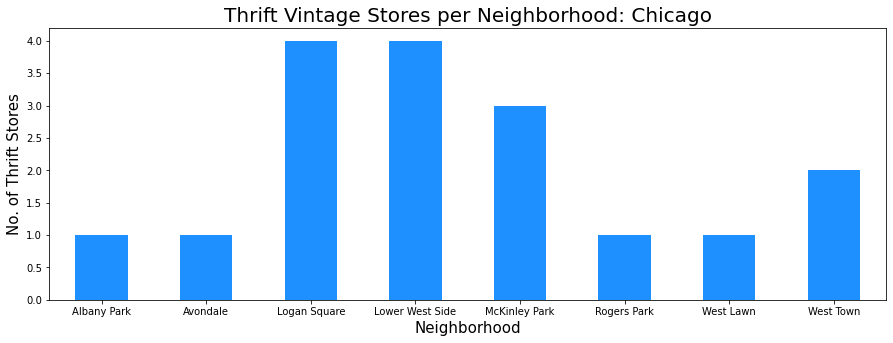

In [94]:
# Create the plot bar graph for Thrift Stores
clr = "dodgerblue"
Thrift_Shop.groupby('Neighborhood')['Venue'].count().plot.bar(figsize=(15,5), color = clr)
plt.title('Thrift Vintage Stores per Neighborhood: Chicago', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Thrift Stores', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()